Current working directory: c:\Users\Admin\OneDrive - Indira College of Commerce and Science\Desktop\jupyter projects
  customer_id trans_date  tran_amount
0      CS5295  11-Feb-13           35
1      CS4768  15-Mar-15           39
2      CS2122  26-Feb-13           52
3      CS1217  16-Nov-11           99
4      CS1850  20-Nov-13           78
  customer_id  response
0      CS1112         0
1      CS1113         0
2      CS1114         1
3      CS1115         1
4      CS1116         1


C:\Users\Admin\AppData\Local\Temp\ipykernel_18148\3036622663.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date']=pd.to_datetime(df['trans_date'])


Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []
Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


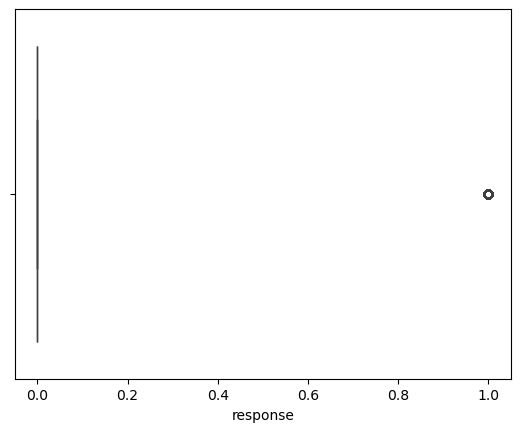

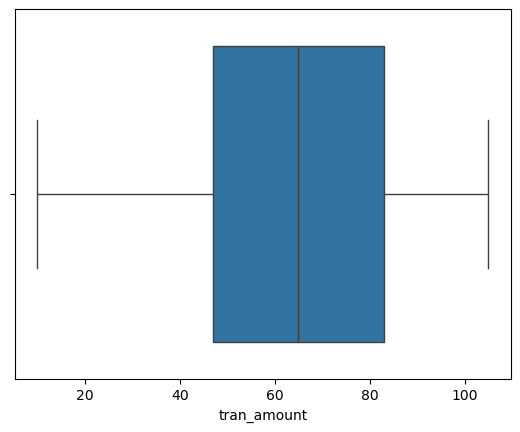

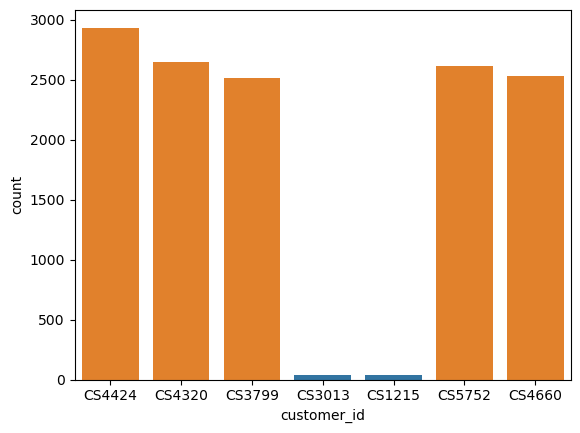

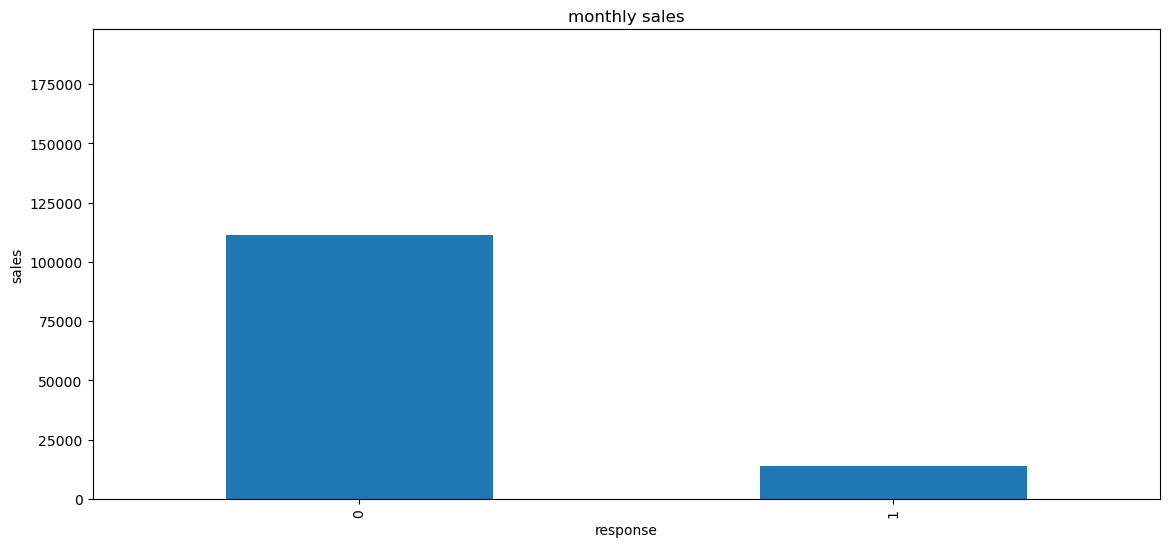

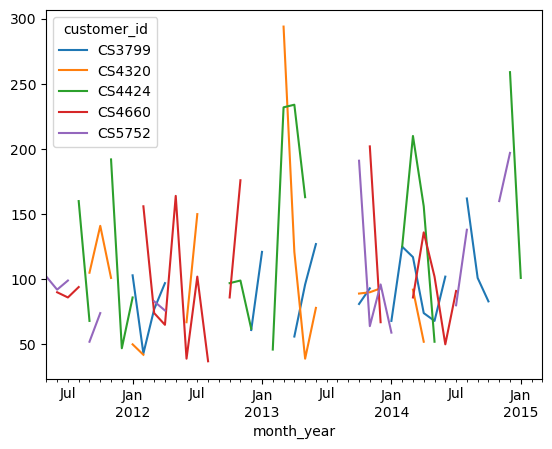

In [38]:


# Print the current working directory
print("Current working directory:", os.getcwd())

# Load the CSV file (adjust the path as necessary)
trxn = pd.read_csv(r"C:\Users\Admin\Downloads\Retail_Data_Transactions.csv")
print(trxn.head())

response = pd.read_csv(r"C:\Users\Admin\Downloads\Retail_Data_Response.csv")
print(response.head())

df=trxn.merge(response,on='customer_id',how = 'left')
df

df.dtypes
df.shape
df.head()
df.tail()
df.describe()

#missing values
df.isnull().sum()
(31/125000)*100
df=df.dropna()
df 

#chang dtype
df['trans_date']=pd.to_datetime(df['trans_date'])
df
set(df['response'])
df['response']=df['response'].astype('int64')

set(df['response'])

# check for outliers
#z-SCORE
from scipy import stats
import numpy as np

# colc z score
z_scores = np.abs(stats.zscore(df['tran_amount']))

# set a threshold 
threshold = 3

outliers = z_scores>threshold

print(df[outliers])

# check for outliers
#z-SCORE
from scipy import stats
import numpy as np

# colc z score
z_scores = np.abs(stats.zscore(df['response']))

# set a threshold 
threshold = 3

outliers = z_scores>threshold

print(df[outliers])

import seaborn as sns
import matplotlib .pyplot as plt

sns.boxplot(x=df['response'])
plt.show()


import seaborn as sns
import matplotlib .pyplot as plt

sns.boxplot(x=df['tran_amount'])
plt.show()

# creating new column 
df['month']=df['trans_date'].dt.month
df




# customers having a highest num of orders
customer_counts =df['customer_id'].value_counts().reset_index()
customer_counts.columns = ['customer_id','count']

# Sort
top_5_cus = customer_counts.sort_values(by='count',ascending=False).head(5)
top_5_cus

sns.barplot(x='customer_id',y='count',data=top_5_cus)

# customers having a highest num of orders
customer_sales =df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

# Sort
top_5_sal = customer_sales.sort_values(by='tran_amount',ascending=False).head(5)
top_5_sal

sns.barplot(x='customer_id',y='tran_amount',data=top_5_sal)



import matplotlib.dates as mdates
df['month_year']=df['trans_date'].dt.to_period('M')
monthly_sales=df.groupby('month_year')['tran_amount'].sum()

monthly_sales.index=monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index,monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('month-year')
plt.ylabel('sales')
plt.title('monthly sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

recency = df.groupby('customer_id')['trans_date'].max()
frequency=df.groupby('customer_id')['trans_date'].count()
monetary=df.groupby('customer_id')['tran_amount'].sum()
rfm = pd.DataFrame({'recency':recency,'frequency':frequency,'monetary':monetary})
rfm


def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
        return 'p0'
    elif (2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetary']<=1000):
       return'p1'
    else :
        return 'p2'
rfm['segment']=rfm.apply(segment_customer,axis=1)
rfm


churn_count = df['response'].value_counts()

churn_counts.plot(kind='bar')


top_5_cus = monetary.sort_values(ascending=False).head(5).index
top_customers_df=df[df['customer_id'].isin(top_5_cus)]

top_customer_sales=top_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')

df.to_csv('MainData.csv')
rfm.to_csv('AddAnlys.csv')





